sloupec stav:           3 = potvrzený, že daroval krev
sloupec klient VZP      1 = ano
sloupec jen prvodárci:  1 = ano 
prvodárci               410 ml
druhodárce              500 ml

In [30]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np
%matplotlib inline

In [31]:
data = pd.read_excel(r'data/Sešit1.xlsx')

In [32]:
#duplicity
data['E-mail'].value_counts()

zdenek.charvat@vzp.cz             2
zimova.helena@seznam.cz           2
andysir@seznam.cz                 2
ilazarova@seznam.cz               1
k.kohlova@seznam.cz               1
possnit@gmail.com                 1
skoumalovalenka@seznam.cz         1
barbora.kasparova97@seznam.cz     1
kalabusova.k@seznam.cz            1
masara69@seznam.cz                1
i.pospichalova@seznam.cz          1
darida@atlas.cz                   1
leonahenclova@centrum.cz          1
daniela.zarova@gmail.com          1
ruzacharvatova@seznam.cz          1
tosi.novotni@seznam.cz            1
kurina@volny.cz                   1
janoskova.m@volny.cz              1
martinapisanova@seznam.cz         1
jermine@seznam.cz                 1
alena.harudova@seznam.cz          1
petrakomendova@centrum.cz         1
veronikadlaskova@gmail.com        1
Kate87@seznam.cz                  1
NOVIS70@seznam.cz                 1
lucinap@volny.cz                  1
zako.tom@seznam.cz                1
karolina.haklova@chart-ind.c

In [33]:
obok = pd.read_csv(r'data/obce_okresy_ciselnik.csv')

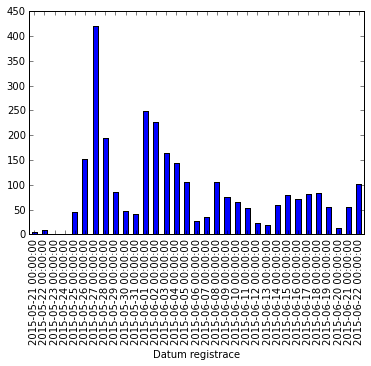

In [34]:
#registrace v case
serie = pd.Series(np.ones(len(data)), index=data['Datum registrace'])
serie.resample('D', how='sum').plot('bar')

In [35]:
#proteklo
(len(data[(data['Jen prvodárci'] == 1) & (data['Stav'] == 3)]) * 410) + (len(data[(data['Jen prvodárci'] == 0) & (data['Stav'] == 3)]) * 500)

417090

In [36]:
#počet VZP
len(data[data['Klient VZP'] == 1]) / len(data)

0.680704176734553

In [37]:
#u VZP poměr mezi registrovanými a dárci
len(data[(data['Klient VZP'] == 1) & (data['Stav'] == 3)]) / len(data[data['Klient VZP'] == 1])

0.2814401622718053

In [38]:
#neVZP
len(data[(data['Klient VZP'] != 1) & (data['Stav'] == 3)]) / len(data[data['Klient VZP'] != 1])

0.36972972972972973

In [39]:
#dalo prvodárců
len(data[(data['Jen prvodárci'] == 1) & (data['Stav'] == 3)])

349

In [40]:
#dalo
len(data[(data['Stav'] == 3)])

897

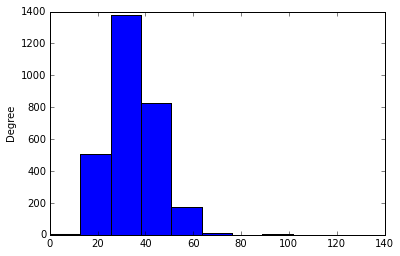

In [41]:
#věk všech
data['Věk'].plot('hist')

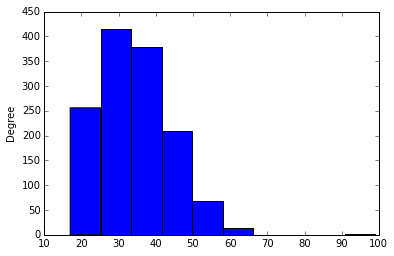

In [42]:
#věk prevodárci
data[data['Jen prvodárci'] == 1]['Věk'].plot('hist')

In [43]:
def mesto(val):
    if val.startswith('Praha'):
        return 'Praha'
    elif val.startswith('Brno'):
        return 'Brno'
    elif val.startswith('Karviná'):
        return 'Karviná'
    elif val.startswith('Uheské Hradiště'):
        return 'Uherské Hradiště'
    else:
        return val.strip()

data['mesto'] = data['Město'].apply(lambda x: mesto(x))

In [44]:
data = data.merge(obok, left_on='mesto', right_on='NAZ_OBEC', how='left')

In [45]:
data['celkem'] = 1

In [46]:
repl = {1: 0, 3: 1}

data.Stav = data.Stav.apply(lambda x: repl[x])

In [47]:
data.columns

Index(['ID', 'Datum registrace', 'Jméno', 'E-mail', 'Věk', 'Klient VZP', 'Kód',
       'Stav', 'ID stanice', 'Stanice', 'Město', 'Jen prvodárci', 'mesto',
       'NAZ_OBEC', 'KOD_LAU1', 'NAZ_LAU1', 'KOD_CZNUTS3', 'NAZ_CZNUTS3',
       'celkem'],
      dtype='object')

In [48]:
#data = data[data['Klient VZP'] == 1]

In [49]:
##tadadada
reg = data[['NAZ_LAU1', 'Věk', 'celkem']].groupby('NAZ_LAU1').agg([np.mean, sum])
reg.reset_index(inplace=True)
reg.columns = ['NAZ_LAU1', 'reg_vek', 'dump', 'dump', 'reg_celkem']
reg.drop('dump', axis=1, inplace=True)
reg.set_index('NAZ_LAU1', inplace=True)

In [50]:
darci = data[data['Stav'] == 1][['NAZ_LAU1', 'Věk', 'celkem']].groupby('NAZ_LAU1').agg([np.mean, sum])
darci.reset_index(inplace=True)
darci.columns = ['NAZ_LAU1', 'darci_vek', 'dump', 'dump', 'darci_celkem']
darci.drop('dump', axis=1, inplace=True)
darci.set_index('NAZ_LAU1', inplace=True)

In [51]:
prvo = data[data['Jen prvodárci'] == 1][['NAZ_LAU1', 'Věk', 'celkem']].groupby('NAZ_LAU1').agg([np.mean, sum])
prvo.reset_index(inplace=True)
prvo.columns = ['NAZ_LAU1', 'prvo_vek', 'dump', 'dump', 'prvo_celkem']
prvo.drop('dump', axis=1, inplace=True)
prvo.set_index('NAZ_LAU1', inplace=True)

In [55]:
prvo_dali = data[(data['Stav'] == 1) & (data['Jen prvodárci'] == 1)][['NAZ_LAU1', 'Věk', 'celkem']].groupby('NAZ_LAU1').agg([np.mean, sum])
prvo_dali.reset_index(inplace=True)
prvo_dali.columns = ['NAZ_LAU1', 'prvo_dali_vek', 'dump', 'dump', 'prvo_dali_celkem']
prvo_dali.drop('dump', axis=1, inplace=True)
prvo_dali.set_index('NAZ_LAU1', inplace=True)

29


In [56]:
len(prvo_dali)

29

In [54]:
reg.join(darci, rsuffix='_').join(prvo, rsuffix='_').join(prvo_dali, rsuffix='_') #.to_excel(r'data/sumarized_vzp.xlsx')

,reg_vek,reg_celkem,darci_vek,darci_celkem,prvo_vek,prvo_celkem,prvo_dali_vek,prvo_dali_celkem
NAZ_LAU1,,,,,,,,
Benešov,34.700000,20,34.800000,5,NaN,NaN,NaN,NaN
Beroun,38.315789,19,NaN,NaN,NaN,NaN,NaN,NaN
Blansko,38.300000,40,37.625000,8,NaN,NaN,NaN,NaN
Brno-město,33.879310,232,37.843750,32,NaN,NaN,NaN,NaN
Bruntál,38.929204,226,38.390244,82,NaN,NaN,NaN,NaN
Břeclav,34.200000,20,35.812500,16,NaN,NaN,NaN,NaN
Cheb,35.217391,23,31.000000,6,35.217391,23,31.000000,6
Chomutov,33.914286,35,33.333333,18,NaN,NaN,NaN,NaN
Chrudim,37.600000,55,38.842105,19,NaN,NaN,NaN,NaN
